## FINAL PROJECT 2 HACKTIV

## a. INTRODUCTION

### Mengenai Dataset
- Jumlah dataset : 145.460 ROW & 23 COLUMN
- Sumber Dataset : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

### Tujuan
- Untuk memprediksi Rain Tomorrow (Apakah hari berikutnya hujan (Ya)/(Tidak) dengan Logistic Regression dan Support Vector Machine (SVM).
- Melihat Perbandingan dari Skor Hasil Akurasi prediksi Rain Tomorrow antara Logistic Regression dengan Support Vector Machine (SVM).

## b. IMPORT LIBRARY

In [1]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

## c.DATA LOADING 
Pada Tahap Data Loading, hal yang dilakukan adalah :
- Mengimpor dataset
- Menampilkan tabel dataset (teratas dan terbawah)
- Melihat jumlah baris dan kolom
- Melihat informasi tiap variabel
- Mengubah dtype pada variabel Date menjadi datetime

In [2]:
# mengimpor dataset
df = pd.read_csv("weatherAUS.csv")

In [3]:
# menampilkan 4 dataset terbawah
df.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


In [4]:
# menampilkan 4 dataset terbawah
df.tail(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
#melihat jumlah baris dan kolom
df.shape

(145460, 23)

Terdapat **145.460 Baris** dan **23 Kolom**

In [6]:
#melihat informasi setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# mengubah dtype pada variabel Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#cek kembali tipe data pada kolom
df['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

## d. DATA CLEANING
Pada tahap data cleaning, hal yang dilakukan adalah :
- Mengecek missing value
- Menghilangkan missing value
- Cek duplikasi data
- Menambahkan 3 variabel baru ('year', 'month' dan 'day')
- Mengubah data variabel Rain Today dan Rain Tomorrow menjadi data numerik

In [9]:
#mengecek missing value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
# drop missing value
df = df.dropna()

In [11]:
# check if there any missing value
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
#cek duplikasi data
df.duplicated().any()

False

Tidak ada data yang **terduplikasi**

Menambahkan **3 variabel baru** ('year', 'month' dan 'day'). Variabel ini akan digunakan pada tahap visualisasi data nanti

In [13]:
# Menambahkan 3 variabel baru ('year', 'month' dan 'day')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [14]:
# mengecek jika 3 variabel sudah ditambahkan
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [15]:
### mengubah data variabel Rain Today dan Rain Tomorrow menjadi data numerik
df['RainToday'] = df['RainToday'].map({'No':0, 'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})

In [16]:
#cek apakah datanya sudah diubah
df[['RainToday','RainTomorrow']].head(5)

,RainToday,RainTomorrow
6049,0,0
6050,0,0
6052,0,0
6053,0,0
6054,0,0


In [17]:
#melihat kembali dimensi data
df.shape

(56420, 26)

Setelah Melakukan ***Data Cleaning*** dan ***penambahan 3 variabel*** pada dataset, data yang awalnya terdapat **145.460 Baris dan 23 Kolom**, menjadi **56.420 Baris dan 26 Kolom**.

## e. DATA EXPLORATION
Dalam Data Exploration, kami melakukan beberapa analisis, diantaranya :
1. BAGAIMANA RATA-RATA KECEPATAN ANGIN (WindGustSpeed) per BULAN (Month) ?
2. BAGAIMANA RATA-RATA KECEPATAN ANGIN (WindGustSpeed) PER TAHUN (Year)?
3. BAGAIMANA INTENSITAS CURAH HUJAN (Rainfall) DI SETIAP WILAYAH (Location)?
4. BAGAIMANA RATA-RATA CURAH HUJAN (Rainfall) DARI TAHUN 2007-2017?
5. BAGAIMANA RATA-RATA CURAH HUJAN (Rainfall) PER BULAN (Month)?
6. BAGAIMANA RATA-RATA KECEPATAN ANGIN (WindGust Speed) BERDASARKAN ARAH MATA ANGIN (WindGustDir)?
7. BAGAIMANA PERBANDINGAN SUHU MAKSIMAL (MaxTemp) & MINIMAL (MinTemp) DI TIAP WILAYAH (Location)?
8. Melihat korelasi dari tiap variabel terhadap variabel Rain Tomorrow

### 1. BAGAIMANA RATA-RATA KECEPATAN ANGIN (WindGustSpeed) per BULAN (Month) ?

In [18]:
windspeed1 = df[['WindGustSpeed', 'month']].groupby(['month'], as_index=False).agg({'WindGustSpeed':'mean'})

In [19]:
windspeed1

,month,WindGustSpeed
0,1,44.097399
1,2,42.126035
2,3,40.339196
3,4,37.421303
4,5,37.237745
5,6,37.006353
6,7,39.224464
7,8,41.414340
8,9,42.732428
9,10,42.941176


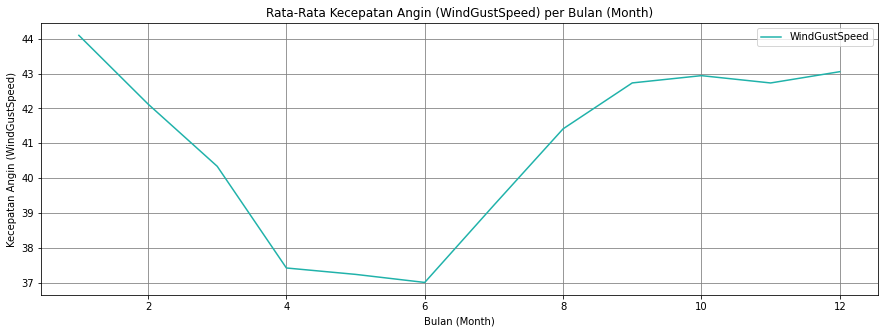

In [20]:
windspeed1.plot(kind='line', x='month', y='WindGustSpeed', figsize=(15,5),color='lightseagreen')

plt.title('Rata-Rata Kecepatan Angin (WindGustSpeed) per Bulan (Month)')
plt.xlabel('Bulan (Month)')
plt.ylabel('Kecepatan Angin (WindGustSpeed)')
plt.grid(color="grey")

plt.show()

### Interpretasi :
- Kecepatan angin dari bulan 1 (Januari) hingga bulan ke-6 (Juni) menurun.
- Kecepatan angin meningkat kembali dari bulan ke-6 (Juni) hingga bulan ke-12 (Desember).

### 2. BAGAIMANA RATA-RATA KECEPATAN ANGIN (WindGustSpeed) PER TAHUN (Year)?

In [21]:
windspeed2 = df[['WindGustSpeed', 'year']].groupby(['year'], as_index=False).agg({'WindGustSpeed':'mean'})

In [22]:
windspeed2

,year,WindGustSpeed
0,2007,40.918033
1,2008,41.761941
2,2009,41.996982
3,2010,40.098647
4,2011,40.406182
5,2012,40.814385
6,2013,41.425792
7,2014,40.850731
8,2015,40.883842
9,2016,41.086385


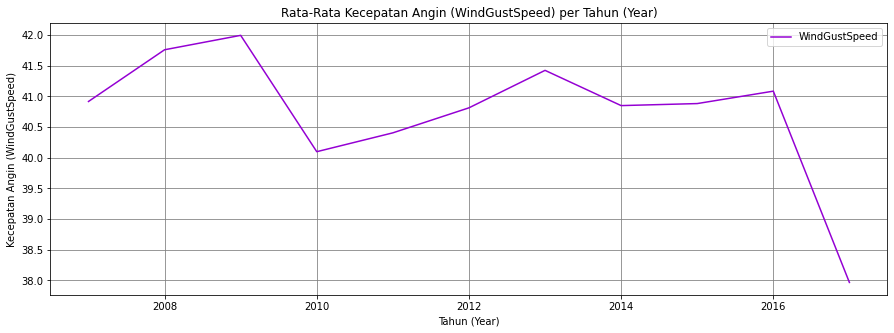

In [23]:
windspeed2.plot(kind='line', x='year', y='WindGustSpeed', figsize=(15,5), color='darkviolet')

plt.title('Rata-Rata Kecepatan Angin (WindGustSpeed) per Tahun (Year)')
plt.xlabel('Tahun (Year)')
plt.ylabel('Kecepatan Angin (WindGustSpeed)')
plt.grid(color="grey")

plt.show()

### Interpretasi:
- Kecepatan angin pada tahun 2007-2009 mengalami peningkatan dari kecepatan 40.91 menjadi 41.99
- Pada tahun 2009-2010 mengalami penurunan dari kecepatan 41.99 menjadi 40.09
- Pada tahun 2010-2013 mengalami peningkatan dari kecepatan 40.09 menjadi 41.42
- Pada tahun 2013-2014 mengalami penurunan dari kecepatan 41.42 menjadi 40.85
- Pada tahun 2014-2017 mengalami penurunan dari kecepatan 40.85 menjadi 37.96

### 3. BAGAIMANA INTENSITAS CURAH HUJAN (Rainfall) DI SETIAP WILAYAH (Location)?

In [24]:
rainfall_loc = df[['Rainfall', 'Location']].groupby(['Location'], as_index=False).agg({'Rainfall':'mean'})

In [25]:
rainfall_loc

,Location,Rainfall
0,AliceSprings,0.955556
1,Brisbane,2.855401
2,Cairns,4.522259
3,Canberra,1.906957
4,Cobar,1.182397
5,CoffsHarbour,3.885942
6,Darwin,4.038210
7,Hobart,1.624033
8,Melbourne,1.912118
9,MelbourneAirport,1.455787


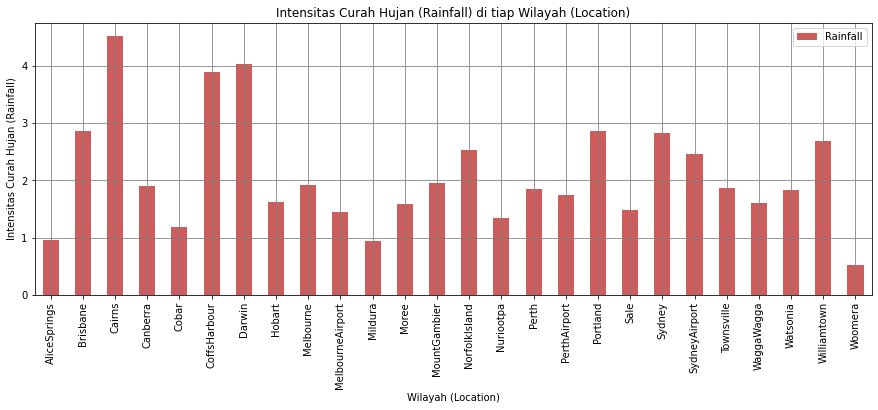

In [26]:
rainfall_loc.plot(kind='bar', x='Location', y='Rainfall', figsize=(15,5),color='indianred')

plt.title('Intensitas Curah Hujan (Rainfall) di tiap Wilayah (Location)')
plt.xlabel('Wilayah (Location)')
plt.ylabel('Intensitas Curah Hujan (Rainfall)')
plt.grid(color="grey")

plt.show()

### interpretasi:
1. Intensitas curah hujan tertinggi terdapat di wilayah Cairns dengan nilai rata-rata 4.522 mm
2. Intensitas curah hujan terendah terdapat di wilayah Woomera dengan nilai rata-rata 0.526 mm

###  4. BAGAIMANA RATA-RATA CURAH HUJAN (Rainfall) DARI TAHUN 2007-2017?

In [27]:
rainfall = df[['Rainfall', 'year']].groupby(['year'], as_index=False).agg({'Rainfall':'mean'})

In [28]:
rainfall

,year,Rainfall
0,2007,3.219672
1,2008,2.080586
2,2009,1.874297
3,2010,2.549865
4,2011,2.644590
5,2012,1.961856
6,2013,2.012772
7,2014,1.837385
8,2015,1.932790
9,2016,2.082197


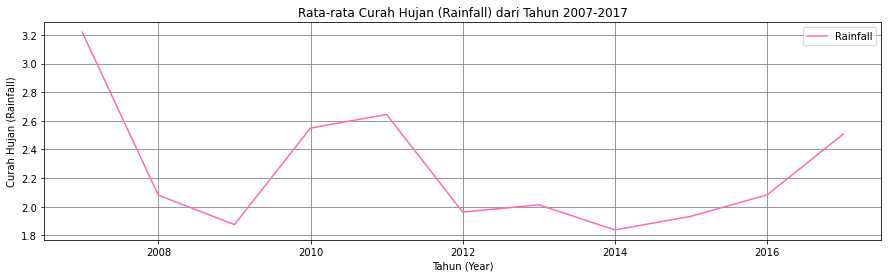

In [29]:
rainfall.plot(kind='line', x='year', y='Rainfall', figsize=(15,4), color='hotpink')

plt.title('Rata-rata Curah Hujan (Rainfall) dari Tahun 2007-2017')
plt.xlabel('Tahun (Year)')
plt.ylabel('Curah Hujan (Rainfall)')
plt.grid(color="grey")

plt.show()

### Interpretasi
Pada tahun 2007 hingga 2009 sempat mengalami penurunan curah hujan. Di tahun berikutnya mengalami kenaikan curah hujan selama 2 tahun dan menurun kembali curah hujan hingga tahun 2014. Dari tahun 2014 curah hujan meningkat kembali hingga 2017.
- Rata-rata Curah Hujan (Rainfall) Tertinggi ada di Tahun 2007 bernilai 3.219 mm
- Rata-rata Curah Hujan (Rainfall) Terendah ada di Tahun 2014 bernilai 1.837 mm

### 5. BAGAIMANA RATA-RATA CURAH HUJAN (Rainfall) PER BULAN (Month) ?

In [30]:
rainfall1 = df[['Rainfall', 'month']].groupby(['month'], as_index=False).agg({'Rainfall':'mean'})

In [31]:
rainfall1

,month,Rainfall
0,1,2.754224
1,2,2.962071
2,3,2.402319
3,4,2.011940
4,5,1.775429
5,6,2.302760
6,7,1.840348
7,8,1.754928
8,9,1.583980
9,10,1.590148


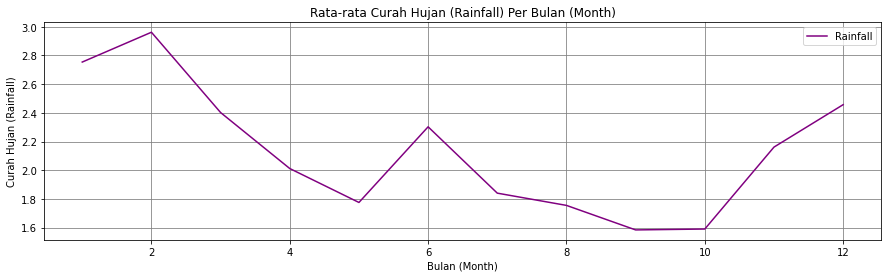

In [32]:
rainfall1.plot(kind='line', x='month', y='Rainfall', figsize=(15,4), color='purple')

plt.title('Rata-rata Curah Hujan (Rainfall) Per Bulan (Month)')
plt.xlabel('Bulan (Month)')
plt.ylabel('Curah Hujan (Rainfall)')
plt.grid(color="grey")

plt.show()

### Interpretasi
Pada bulan 1 (Januari) hingga bulan ke-10 (Oktober) mengalami penurunan curah hujan (2.754 ke 1.590), dan meningkat dimulai dari bulan ke-10 (Oktober) hingga bulan ke-12 (Desember) (1.590 ke 2.457).
- Rata-rata Curah Hujan (Rainfall) Tertinggi ada di Bulan Februari (2) bernilai 2.962 mm
- Rata-rata Curah Hujan (Rainfall) Terendah ada di Bulan September (9) bernilai 1.590 mm

### 6. BAGAIMANA RATA-RATA KECEPATAN ANGIN (WindGust Speed) BERDASARKAN ARAH MATA ANGIN (WindGustDir)?

In [33]:
wind = df[['WindGustSpeed','WindGustDir']].groupby(['WindGustDir'], as_index=False).agg({'WindGustSpeed':'mean'})

In [34]:
wind

,WindGustDir,WindGustSpeed
0,E,38.901019
1,ENE,35.996524
2,ESE,38.720411
3,N,45.033967
4,NE,36.421036
5,NNE,39.484499
6,NNW,41.685452
7,NW,44.578867
8,S,40.589384
9,SE,38.970483


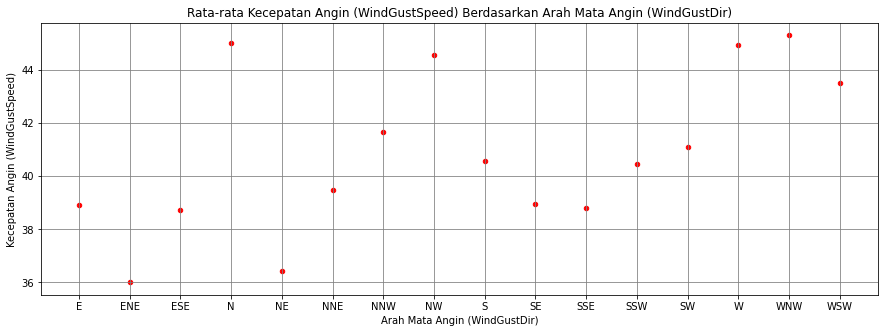

In [35]:
wind.plot(kind='scatter', x='WindGustDir', y='WindGustSpeed', figsize=(15,5), color='red')

plt.title('Rata-rata Kecepatan Angin (WindGustSpeed) Berdasarkan Arah Mata Angin (WindGustDir)')
plt.xlabel('Arah Mata Angin (WindGustDir)')
plt.ylabel('Kecepatan Angin (WindGustSpeed)')
plt.grid(color="grey")

plt.show()

### Interpretasi :
1. Kecepatan angin paling tinggi terdapat di arah WNW (West-Norwest/Barat Barat Laut) dengan kecepatan 45.31
2. Kecepatan angin paling rendah terdapat di arah ENE (East-Noreast/Timur Timur Laut) dengan kecepatan 35.99

### 7. BAGAIMANA PERBANDINGAN SUHU MAKSIMAL (MaxTemp) & MINIMAL (MinTemp) DI TIAP WILAYAH (Location)?

In [36]:
temperature = df[['MaxTemp', 'MinTemp', 'Location']].groupby(['Location'],as_index=False).agg({'MinTemp':'mean','MaxTemp':'mean'})

In [37]:
temperature

,Location,MinTemp,MaxTemp
0,AliceSprings,13.878093,29.724921
1,Brisbane,16.365628,26.436810
2,Cairns,21.129296,29.551596
3,Canberra,7.727829,20.363822
4,Cobar,13.828090,26.225281
5,CoffsHarbour,14.485000,23.766304
6,Darwin,23.166492,32.559536
7,Hobart,8.957091,17.783961
8,Melbourne,11.672445,20.590253
9,MelbourneAirport,9.958313,20.494537


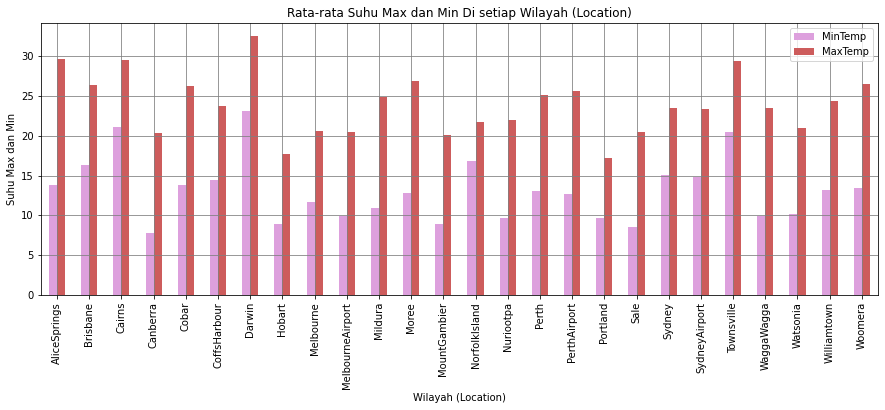

In [38]:
temperature.plot(kind='bar',x='Location', figsize=(15,5), color=['plum','indianred'])

plt.title('Rata-rata Suhu Max dan Min Di setiap Wilayah (Location)')
plt.xlabel('Wilayah (Location)')
plt.ylabel('Suhu Max dan Min')
plt.grid(color="grey")

plt.show()

### Interpretasi :
Keterangan : 
- Merah : MAX TEMP
- PINK : MIN TEMP
1. Suhu yang Paling Tinggi (MaxTemp) terdapat di Wilayah 'Darwin' dengan nilai suhu 32.5 derajat celcius
2. Suhu yang Paling Rendah (MinTemp) terdapat di Wilayah 'Canberra' dengan nilai suhu 7 derajat celcius

### Melihat korelasi dari tiap variabel terhadap variabel Rain Tomorrow

In [39]:
df_temp = df.copy()
cat_col_list = df_temp.columns[(df_temp.dtypes == 'object')].to_list()
for col in cat_col_list:
    df_temp[col] = preprocessing.LabelEncoder().fit_transform(df_temp[col])

In [40]:
# Melihat korelasi dari tiap variabel terhadap variabel Rain Tomorrow
df_temp.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.455358
Cloud3pm         0.388574
Cloud9am         0.323972
RainToday        0.309098
Humidity9am      0.271033
Rainfall         0.254342
WindGustSpeed    0.233158
WindSpeed3pm     0.088862
MinTemp          0.087428
WindSpeed9am     0.083904
WindGustDir      0.061751
WindDir9am       0.035992
WindDir3pm       0.032203
day              0.001359
month            0.001046
Location        -0.005100
year            -0.006060
Temp9am         -0.018179
Evaporation     -0.130002
MaxTemp         -0.147467
Temp3pm         -0.183586
Pressure3pm     -0.230418
Pressure9am     -0.254816
Sunshine        -0.453407
Name: RainTomorrow, dtype: float64

### Interpretasi :
Berdasarkan korelasi tersebut, terlihat bahwa kolom yang paling berpengaruh terhadap harga adalah:
1. Humidity3pm (Kelembapan jam 3 sore) dengan korelasi 0.455358
2. Cloud3pm (cuaca berawan jam 3 sore) dengan korelasi 0.388574
3. Cloud9am dengan korelasi 0.323972
4. RainToday (hujan hari ini) dengan korelasi 0.309098
5. Humidity9am (Kelembapan jam 9 pagi) dengan korelasi 0.271033
- Maka ke-5 variabel ini akan dimasukkan ke dalam variabel fitur 'X', sedangkan RainTomorrow akan dimasukkan ke dalam variabel target 'y'.

## f. DATA PREPROCESSING
Dalam tahap Data Preprocessing, hal yang dilakukan adalah :
- Menampilkan Kolom dari Variabel yang akan digunakan
- Encode Data menjadi Numerik
- Deklarasi Variabel Fitur (X) dan Target (y)
- Split Data (80% training dan 20% testing)

### Menampilkan Kolom dari Variabel yang akan digunakan

In [41]:
# Menampilkan Kolom dari Variabel yang akan digunakan
df_fix = df[['Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',  'RainToday','RainTomorrow']]
df_fix.head()

,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
6049,20.0,13.0,2.0,5.0,0,0
6050,30.0,8.0,1.0,1.0,0,0
6052,42.0,22.0,1.0,6.0,0,0
6053,37.0,22.0,1.0,5.0,0,0
6054,19.0,15.0,1.0,6.0,0,0


### Encode Data menjadi Numerik

In [42]:
label = LabelEncoder()
df_fix['RainToday'] = label.fit_transform(df_fix['RainToday'])
df_fix['RainTomorrow'] = label.fit_transform(df_fix['RainTomorrow'])

C:\Users\USER\AppData\Local\Temp\ipykernel_14688\1273460750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['RainToday'] = label.fit_transform(df_fix['RainToday'])
C:\Users\USER\AppData\Local\Temp\ipykernel_14688\1273460750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['RainTomorrow'] = label.fit_transform(df_fix['RainTomorrow'])


### Deklarasi Variabel Fitur (X) dan Target (y)

In [43]:
# Deklarasi Variabel Fitur (X) dan Target (y)
X = df[['Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']]
y = df['RainTomorrow']

### Split Data

In [44]:
# Split Data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

## g. PENDEFINISIAN MODEL
Dalam tahap Data Preprocessing, hal yang dilakukan adalah :
- Membuat variabel yang memanggil model Logistic Regression
- Membuat variabel yang memanggil model Support Vector Machine (SVM)

### Logistic Regression

In [45]:
# Membuat variabel yang memanggil model Logistic Regression
logistic = LogisticRegression()

### Support Vector Machine (SVM)

In [46]:
# Membuat variabel yang memanggil model Support Vector Machine (SVM)
svm_model = LinearSVC()

## h. PELATIHAN MODEL (Model Training)
Dalam Tahap Model Training, kami membuat prediksi data baru (Rain Tomorrow) menggunakan Nodel Logistic Regression dan Support Vector Machine (SVM).

### Logistic Regression

In [47]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [48]:
#prediksi respon untuk dataset test
logreg_pred = logistic.predict(X_test)

In [49]:
#membuat hasil prediksi 
test = X_test.copy()

df_test = pd.DataFrame(test)
df_test['RainTomorrow_Logistic'] = logreg_pred

df_test.head(4)

,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow_Logistic
47050,67.0,39.0,1.0,3.0,0,0
139158,18.0,8.0,1.0,1.0,0,0
23488,69.0,62.0,4.0,3.0,1,0
32117,50.0,42.0,7.0,7.0,0,0


### Support Vector Machine (SVM)

In [50]:
svm_model.fit(X_train,y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [51]:
#prediksi respon untuk dataset test
svm_pred = svm_model.predict(X_test)

In [52]:
#membuat hasil prediksi 
test1 = X_test.copy()

df_test1 = pd.DataFrame(test)
df_test1['RainTomorrow_SVM'] = svm_pred

df_test1.head(4)

,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow_Logistic,RainTomorrow_SVM
47050,67.0,39.0,1.0,3.0,0,0,0
139158,18.0,8.0,1.0,1.0,0,0,0
23488,69.0,62.0,4.0,3.0,1,0,0
32117,50.0,42.0,7.0,7.0,0,0,0


## i. EVALUASI MODEL
Pada Tahap Evaluasi Model, menampilkan Accuracy Score prediksi dan Mean Squared Error dari Model Logistic Regression dan Support Vector Machine (SVM).

### Logistic Regression

In [55]:
print("Accuracy Score:", str(logistic.score(X_test, y_test)))

Accuracy Score: 0.8348989719957461


In [56]:
print("Mean Squared Error:", str(mean_squared_error(y_test, logreg_pred)))

Mean Squared Error: 0.1651010280042538


### Interpretasi
Model Logistic Regression memiliki nilai akurasi sebesar  0.83 atau sekitar 83.48% dan nilai MSE sebesar 0.17 yang berarti model dapat menebak dengan benar 'Rain Tomorrow' sebesar 83.48% kemungkinan.

### Support Vector Machine (SVM)

In [57]:
print("Accuracy Score:", str(svm_model.score(X_test, y_test)))

Accuracy Score: 0.8245303084012762


In [58]:
print("Mean Squared Error:", str(mean_squared_error(y_test, svm_pred)))

Mean Squared Error: 0.17546969159872386


### Interpretasi
Model Support Vector Machine (SVM) memiliki nilai akurasi sebesar  0.82 atau sekitar 82.45% dan nilai MSE sebesar 0.17 yang berarti model dapat menebak dengan benar 'Rain Tomorrow' sebesar 82.45% kemungkinan.

## j. Model Inference
Pada tahap Model Inference, kami membuat model berdasarkan data baru. Seperti tampilan dibawah, kita akan memasukkan data pada:
1. Humidity9 (Kelembapan udara jam 9 pagi)
2. Humidity3 (Kelembapan udara jam 3 sore)
3. Cloud9 = (Cuaca berawan jam 9 pagi)
4. Cloud3 = (Cuaca berawan jam 3 sore)
5. Rain = (Apakah hari ini hujan?(yes/no))
- Jika memasukkan data rain 'yes' maka outputnya Besok diprediksi 'Akan hujan'
- Jika memasukkan data rain 'no' maka outputnya Besok diprediksi 'Tidak Akan hujan'

In [53]:
Humidity9 = float(input('Kelembapan udara jam 9 pagi:'))
Humidity3 = float(input('Kelembapan udara jam 3 sore:'))
Cloud9 = float(input('Cuaca berawan jam 9 pagi:'))
Cloud3 = float(input('Cuaca berawan jam 3 sore:'))
Rain = input('Apakah hari ini hujan?(yes/no)')

input =[Humidity9,Humidity3,Cloud9,Cloud3]

if Rain == 'yes':
    input.append(1)
elif Rain == 'no':
    input.append(0)

Kelembapan udara jam 9 pagi:24
Kelembapan udara jam 3 sore:20
Cuaca berawan jam 9 pagi:30
Cuaca berawan jam 3 sore:25
Apakah hari ini hujan?(yes/no)yes


In [54]:
predicted = logistic.predict([input])

if predicted == 1:
    prediction='Akan hujan'
elif predicted == 2:
    prediction='Tidak akan hujan'

print('Besok diprediksi', prediction)

Besok akan diprediksi Akan hujan


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## k. Pengambilan Kesimpulan

Dapat disimpulkan bahwa:
- Intensitas curah hujan tertinggi terdapat di wilayah Cairns dengan nilai rata-rata 4.522 mm, sedangkan Intensitas curah hujan terendah terdapat di wilayah Woomera dengan nilai rata-rata 0.526 mm.
- Kecepatan angin biasanya menurun dari bulan 1 (Januari) hingga bulan ke-6 (Juni), lalu meningkat kembali dari bulan ke-6 (Juni) hingga bulan ke-12 (Desember).
- Variabel fitur 'Humidity9am, Humidity3pm, Cloud9am, Cloud3pm, dan RainToday' merupakan 5 variabel yang memiliki pengaruh terhadap variabel target 'RainTomorrow'. Variabel ini diambil berdasarkan urutan korelasi terkuat positif.
- Nilai Korelasinya:
1. Humidity3pm dengan korelasi 0.455358
2. Cloud3pm dengan korelasi 0.388574
3. Cloud9am dengan korelasi 0.323972
4. RainToday dengan korelasi 0.309098
5. Humidity9am dengan korelasi 0.271033

- Model Logistic Regression memiliki nilai akurasi sebesar  0.83 atau sekitar 83.48% dan nilai MSE sebesar 0.17 yang berarti model dapat menebak dengan benar 'Rain Tomorrow' sebesar 83.48% kemungkinan.
- Model Support Vector Machine (SVM) memiliki nilai akurasi sebesar  0.82 atau sekitar 82.45% dan nilai MSE sebesar 0.17 yang berarti model dapat menebak dengan benar 'Rain Tomorrow' sebesar 82.45% kemungkinan.
- Kedua model ini memiliki Accuracy Score yang hampir sama, namun Proses Training Model Logistic Regression lebih cepat daripada Model Support Vector Machine (SVM)
